In [3]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [4]:
dataset_train = pd.read_csv("dataset/train.csv")
dataset_test = pd.read_csv("dataset/test.csv")

In [5]:
dataset_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
dataset_train.columns[dataset_train.isnull().any()]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [7]:
missing_values=dataset_train.isnull().sum()/len(dataset_train)
missing_values[missing_values>0].sort_values()

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

(array([ 75.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   3.]),
 array([ 0.        ,  0.09952055,  0.1990411 ,  0.29856164,  0.39808219,
         0.49760274,  0.59712329,  0.69664384,  0.79616438,  0.89568493,
         0.99520548]),
 <a list of 10 Patch objects>)

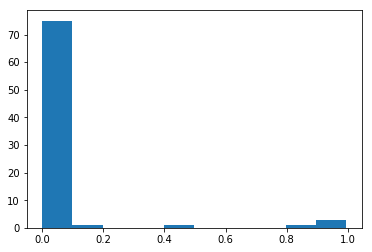

In [8]:
plt.hist(missing_values, histtype='bar')

,count,Name
Name,,
Electrical,0.000685,Electrical
MasVnrType,0.005479,MasVnrType
MasVnrArea,0.005479,MasVnrArea
BsmtQual,0.025342,BsmtQual
BsmtCond,0.025342,BsmtCond
BsmtFinType1,0.025342,BsmtFinType1
BsmtExposure,0.026027,BsmtExposure
BsmtFinType2,0.026027,BsmtFinType2
GarageCond,0.055479,GarageCond


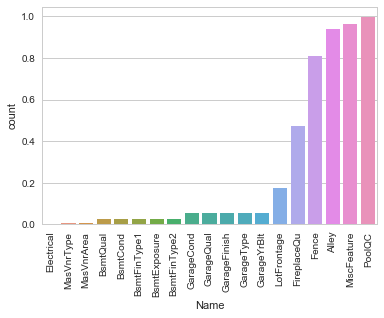

In [9]:
miss = missing_values[missing_values>0].sort_values().to_frame()

miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)


miss

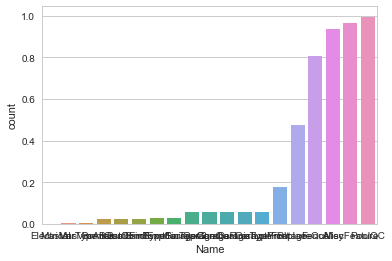

In [10]:
sns.barplot(x = 'Name', y = 'count', data=miss)

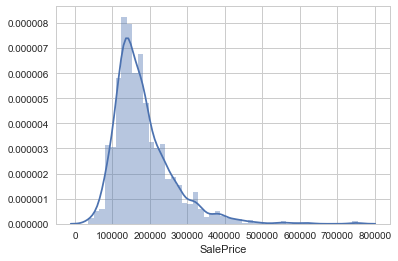

In [11]:
sns.distplot(dataset_train['SalePrice'])

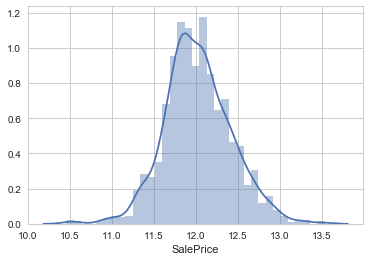

In [12]:
sns.distplot(np.log(dataset_train['SalePrice']))

In [13]:
numeric_data=dataset_train.select_dtypes(include=[np.number])
categorical_data=dataset_train.select_dtypes(exclude=[np.number])

In [14]:
numeric_data.shape

(1460, 38)

In [15]:
categorical_data.shape
sns.set(rc={'figure.figsize':(11.7,8.27)})

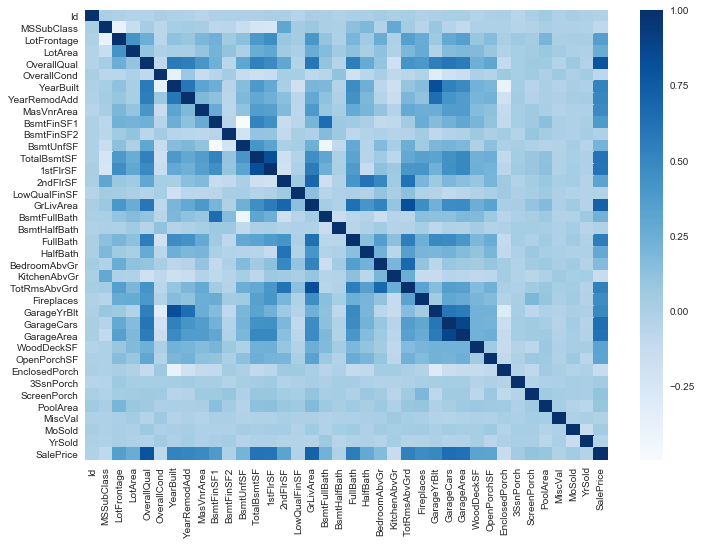

In [16]:

corr=numeric_data.corr()
sns.heatmap(corr, cmap="Blues")


In [17]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values

(SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64, '\n')


In [18]:
pivot_overallqual=dataset_train.pivot_table(values='SalePrice', index='OverallQual', aggfunc=np.median)

In [20]:
pivot_overallqual

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


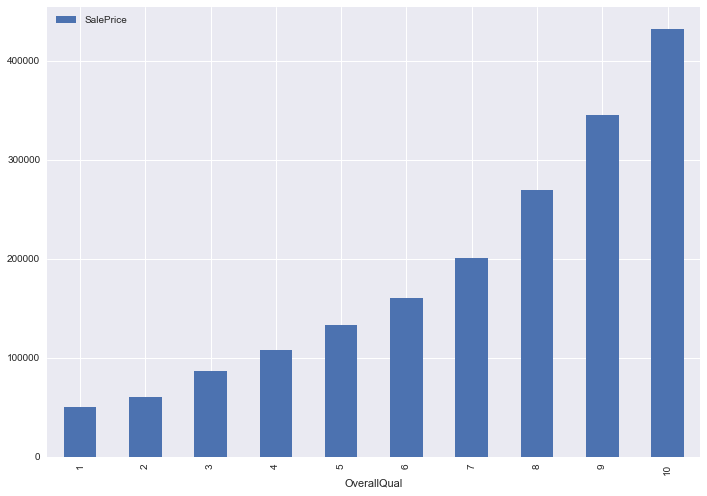

In [24]:
pivot_overallqual.plot(kind='bar')

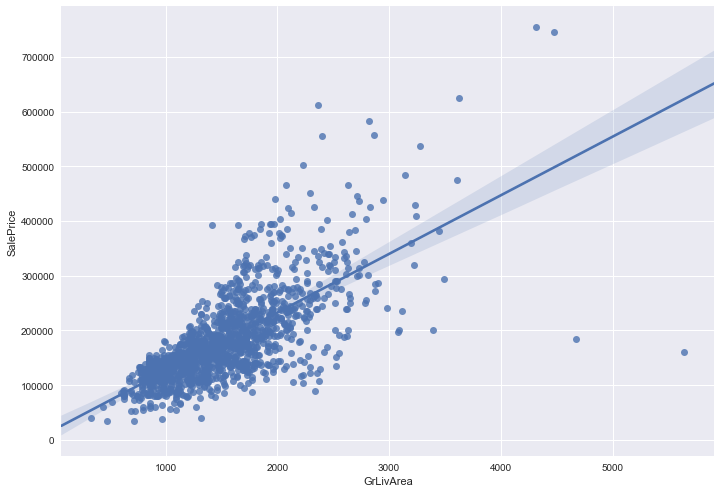

In [25]:
sns.regplot(dataset_train['GrLivArea'], dataset_train['SalePrice'])

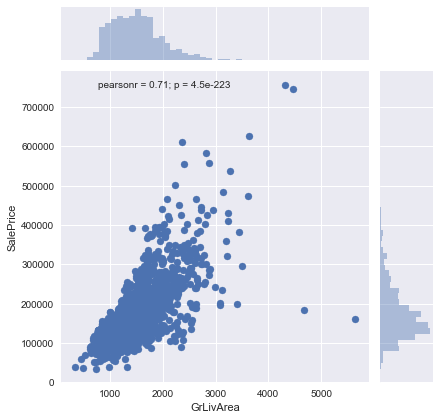

In [26]:
sns.jointplot(dataset_train['GrLivArea'], dataset_train['SalePrice'])

In [27]:
pivot_garagecars=dataset_train.pivot_table(values='SalePrice', index='GarageCars', aggfunc=np.median)

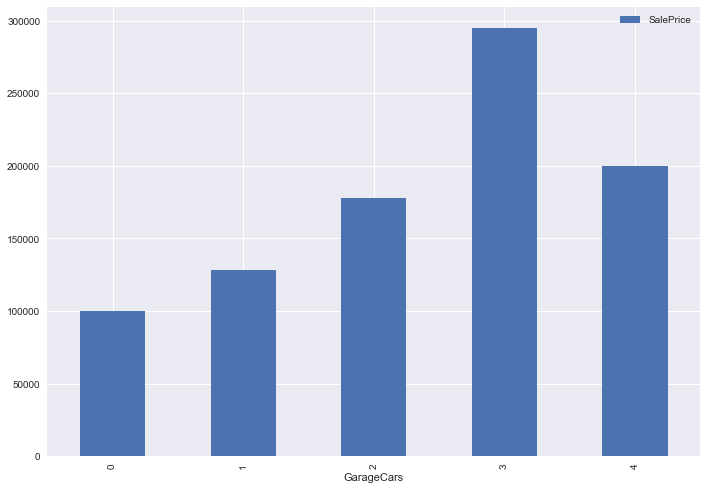

In [28]:
pivot_garagecars.plot(kind='bar')

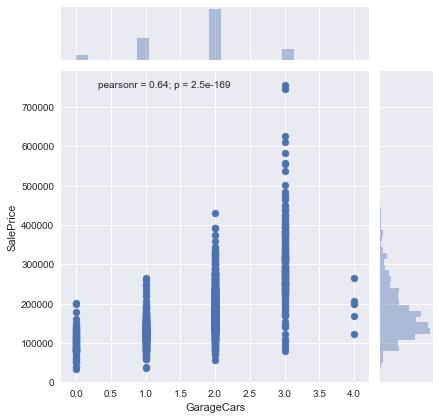

In [30]:
sns.jointplot(dataset_train['GarageCars'], dataset_train['SalePrice'])